<a href="https://colab.research.google.com/github/yun890503/titanic-analysis_02/blob/main/titanic_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<ipython-input-75-29342ff1496f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Cabin']=train_df['Cabin'].fillna("No_Cabin")# 因為這列缺失值比較多且隨機，但也不能整個刪除因為刪除會遺失太多資訊，所以要給定一個新的No_Cabin"代表缺失船艙號碼的乘客來進行補植
<ipython-input-75-29342ff1496f>:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( train_df.loc[index_survived ,'Age'], bins=20, color='blue', label='Survived' )
<ipython-input-75-29342ff1496f>:40:

,Title,Age_Mean
0,Capt,70.000000
1,Col,58.000000
2,Don,40.000000
3,Dr,42.000000
4,Jonkheer,38.000000
5,Lady,48.000000
6,Major,48.500000
7,Master,4.574167
8,Miss,21.662069
9,Mlle,24.000000


<ipython-input-75-29342ff1496f>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Age"][i]=Age_Mean.Age_Mean[j]
<ipython-input-75-29342ff1496f>:79: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_X = df_train[columns_X]


[0.78089888 0.78089888 0.78089888 0.7752809  0.81355932]


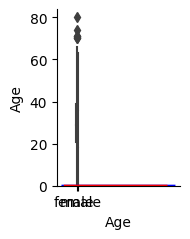

In [75]:
#   在資料分析的工作流程中，不考慮準確度的情況下，以下是一些必備的環節：

# 1. 數據收集與理解：確保收集到相關、完整的數據。了解數據的含義、特徵和結構，探索數據中可能存在的缺失值、異常值和重複值等。

# 2. 數據清洗：處理數據中的缺失值、異常值、重複值等不完備的部分，以保證數據的質量和完整性。

# 3. 特徵選擇與構建：根據問題的需求和數據的性質，選擇最重要、最具代表性的特徵，或者進行特徵的組合、轉換、構建。

# 4. 數據可視化：使用可視化工具將數據呈現出來，以便更直觀地理解數據的分佈、關聯性和特點，並發現潛在的模式和趨勢。

# 5. 探索性數據分析（EDA）：通過統計方法和可視化技術，對數據進行初步的探索，發現數據中可能存在的規律、相關性和特殊情況。

# 6. 數據轉換與標準化：將數據進行標準化、正規化或其他轉換，以確保數據處於合適的範圍和分佈，並幫助機器學習模型更好地學習。

# 7. 建模和評估：根據問題的需求和數據的性質，選擇合適的機器學習算法，並進行模型訓練和評估。

# 8. 結果解釋和報告：解釋和呈現模型的結果，提供結論和建議，並根據分析結果提供相應的商業洞察或意見。

# 以上環節涵蓋了資料分析工作的主要步驟，不同領域和問題可能會有一些細微的差異，但這些步驟通常是資料分析中的必備環節。透過這些步驟，我們可以更好地理解數據，發現數據中的模式和趨勢，從而作出更明智的決策和行動。

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
# 搜尋缺失值
df1=df.isnull().sum()
print(df1)
# 為缺失值想辦法補值
train_df=df.dropna(subset=["Embarked"])
train_df['Cabin']=train_df['Cabin'].fillna("No_Cabin")# 因為這列缺失值比較多且隨機，但也不能整個刪除因為刪除會遺失太多資訊，所以要給定一個新的No_Cabin"代表缺失船艙號碼的乘客來進行補植

import seaborn as sns
# 年齡的處理就比較麻煩了，缺失了將近20%的資料外，年齡會受其他變數的影響，例如年紀較小的人可能會有家長陪同(Parch)，逃生時可能會優先，存活機率也相對大。因此我們需要比對其他變數對年齡的影響來做補值。
sns.catplot(x="Sex",y="Age",data=train_df,kind="box",height=2.5,aspect=.8)
# 可以發現不論男女在各年齡層都有族群存在，Sex不太能做為補值參考
# train_df["Age_missing"] = train_df["Age"].isnull()
# sns.countplot(x="Pclass", hue="Age_missing", data=train_df) # 發現大部分的缺失狀況都是出現在3等艙中
index_survived = (train_df["Age"].isnull()==False)&(train_df["Survived"]==1)
index_died = (train_df["Age"].isnull()==False)&(train_df["Survived"]==0)

sns.distplot( train_df.loc[index_survived ,'Age'], bins=20, color='blue', label='Survived' )
sns.distplot( train_df.loc[index_died ,'Age'], bins=20, color='red', label='Survived' )
# age與姓名相關性
train_df['Title'] = train_df.Name.str.split(', ', expand=True)[1]
train_df['Title'] = train_df.Title.str.split('.', expand=True)[0]
train_df['Title'].unique()
# 計算每個 Title 的年齡平均值
Age_Mean = train_df[['Title','Age']].groupby( by=['Title'] ).mean()

Age_Mean.columns = ['Age_Mean']
Age_Mean.reset_index( inplace=True )

display( Age_Mean )
train_df=train_df.reset_index() #重整index
train_df["Age"].isnull()  #修補Age缺失值
for i in range(len(train_df["Age"].isnull())):
    if train_df["Age"].isnull()[i]==True:
        for j in range(len(Age_Mean.Title)):
            if train_df["Title"][i]==Age_Mean.Title[j]:
                train_df["Age"][i]=Age_Mean.Age_Mean[j]
# train_df.isnull().sum()
train_df1=train_df.drop(['Name','Cabin','Ticket','Title'],axis=1)
# train_df1



# 將非數字轉換成機器學習能懂的數字型態
df_encode = pd.get_dummies(train_df1, columns=['Sex','Embarked'])
df_encode
# #建立模型使用的資料集
df_train = pd.DataFrame(df_encode )
df_train['Survived'] = df_encode['Survived']




columns_X = set(df_train.columns) - {'Survived'}
columns_y = ['Survived']


train_X = df_train[columns_X]
train_y = df_train[columns_y]


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)